# Pymaceuticals Inc.
---

### Analysis

- From the analysis below there are several observations/inferences that can be made. From analyzing all the drug regimens on tumor size it appears that drug Capomulin and Ramicane had the lowest average tumor size out of the ten drugs being testing and one placebo.  These two drugs were also the most tested drugs with them being highest for mice/timepoints of study.  The sex of the mice was measured to be nearly equal with the measurement of 51% male mice and 49% female mice for this study.  The final tumor volume was lower for Capomlin and Ramicane with the average final tumor range in the ~30-40mm3 range compared to Infubinol and Ceftamin in the higher ~50-65mm3 average range.
    The drug of interest Capomulin had a correlation coefficient of 0.84 which indicates a moderate to strong correlation of average tumor volume by weight of each mouse.
    
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine/merge the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_ID= df.loc[df.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data=df.loc[df["Mouse ID"]== "g989"]
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its
clean_df= df[df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                        "Median Tumor Volume": tumor_med,
                        "Tumor Volume Variance": tumor_var,
                        "Tumor Volume Std. Dev.": tumor_std,
                        "Tumor Volume Std. Err.": tumor_sem})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_single_line = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std','sem'])
tumor_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

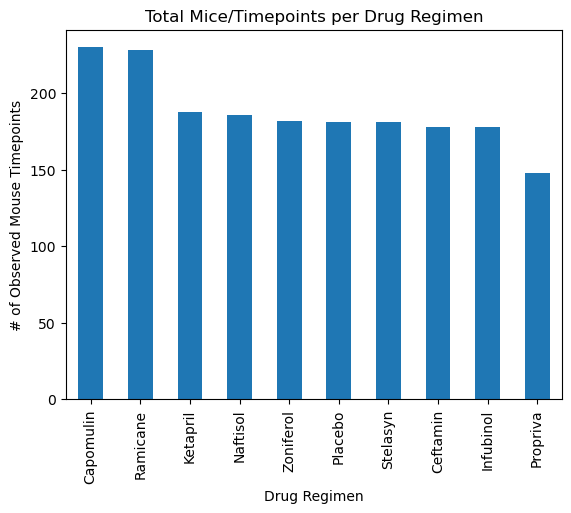

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Mice/Timepoints per Drug Regimen")
plt.show

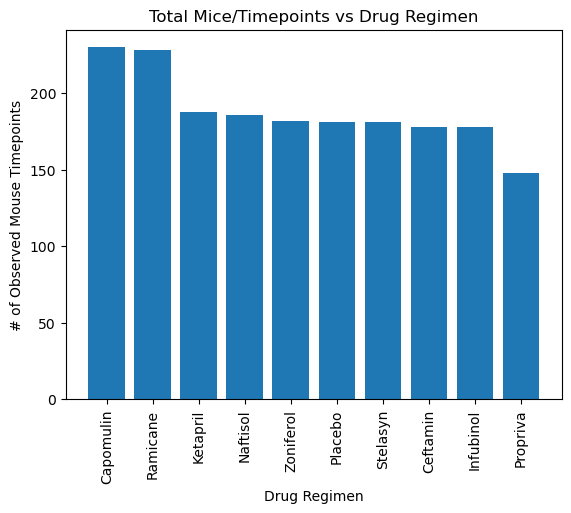

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_description = timepoint.sort_values(ascending = False)
plt.bar(timepoint_description.index, timepoint_description.values)
#Y Label
plt.ylabel('# of Observed Mouse Timepoints')
#X Label
plt.xlabel('Drug Regimen')
#Orientation
plt.xticks(rotation = 'vertical')
plt.title("Total Mice/Timepoints vs Drug Regimen")
plt.show()

<Axes: title={'center': 'Distribution of Female vs Male in Drug Testing'}, ylabel='Sex'>

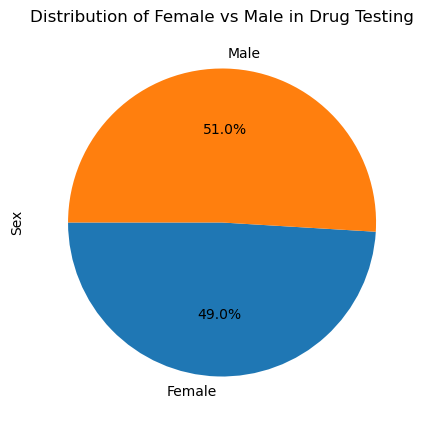

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_Sex = clean_df.groupby(['Sex'])['Sex'].count()
Mice_Sex.plot.pie(title=("Distribution of Female vs Male in Drug Testing"),startangle =180,autopct= '%1.1f%%', figsize = (5,5))

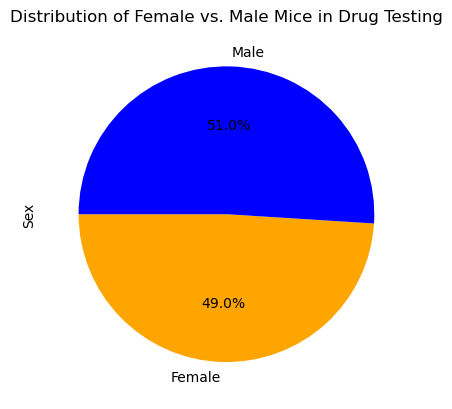

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

slices = [49.0 ,51.0 ]
plt.pie(slices,labels=('Female','Male'),startangle =180,autopct= '%1.1f%%',colors = ["orange","blue"] )

labels = ['Female','Male']
plt.ylabel('Sex')
plt.title("Distribution of Female vs. Male Mice in Drug Testing")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint =clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

In [50]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(last_timepoint,clean_df, on=['Mouse ID', 'Timepoint'], how='left')
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor = []



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    final_tumor_volume = last_df.loc[last_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
                                    
    # add subset 
    tumor.append(final_tumor_volume)
    # Determine outliers using upper and lower bounds 
    
    quartile = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq-lowerq
    
    lowerbound = lowerq - (1.5 * IQR)
    upperbound = upperq + (1.5 * IQR)
    
    outliers=final_tumor_volume.loc[(final_tumor_volume<lowerbound)|(final_tumor_volume>upperbound)]
    
    print(f"{drug} potential outliers {outliers}")
    
   


Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


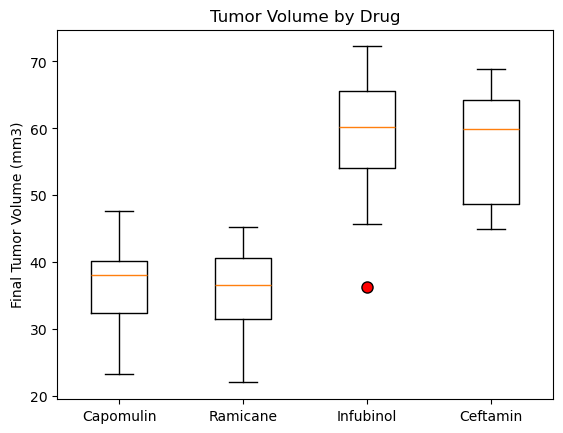

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops =dict(marker= 'o', markerfacecolor = 'r', markersize = 8, markeredgecolor = 'black')
plt.boxplot(tumor,labels=treatments,flierprops=flierprops)
plt.title('Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

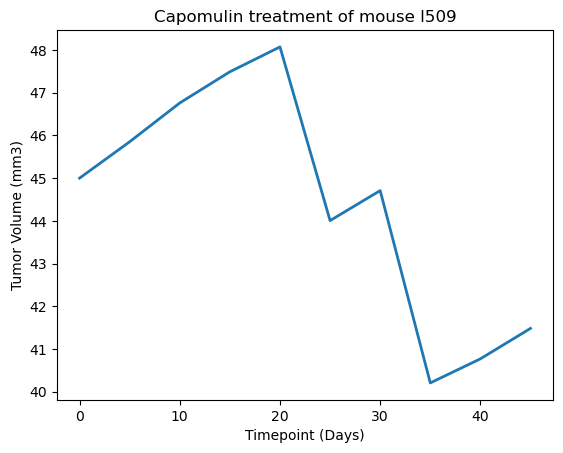

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
line_df

x_axisTP = line_df["Timepoint"]

Tumor_Size = line_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axisTP,Tumor_Size,linewidth=2,markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

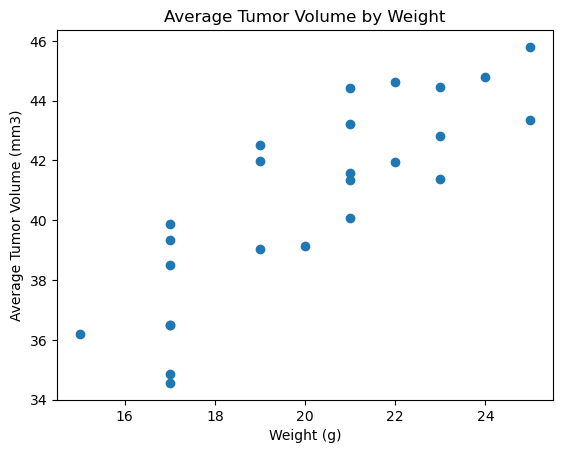

In [58]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capavg = cap_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

In [65]:
# Calculate the correlation coefficient  


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capavg = cap_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()


#Print correlation
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average and the average tumor volume is {corr}.")

The correlation between mouse weight and the average and the average tumor volume is 0.84.


In [66]:
# Calculate a linear regression model 
linear_reg_model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
linear_reg_model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The correlation between mouse weight and the average tumor volume with Capomulin is 0.84.


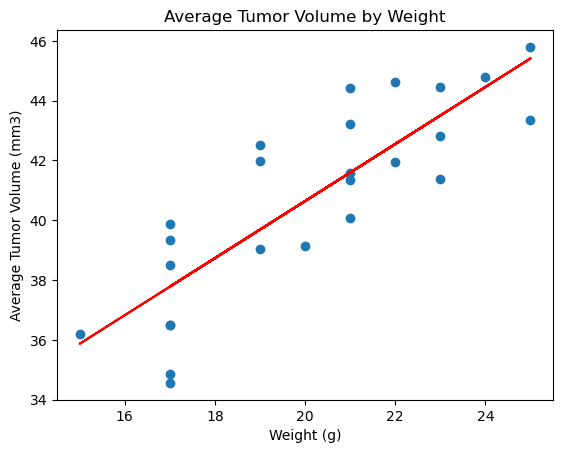

In [73]:
# y=m(slope)x + b(y_intercept)
slope = 0.9544396890241049
y_intercept = 21.552160532685008
#Adding regression line
line = slope*(capavg['Weight (g)']) + y_intercept
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capavg = cap_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
#Plot red linear regression line
plt.plot(capavg['Weight (g)'], line, 'r', label = 'y={:.2f}x+{:.2f}'.format(slope,y_intercept))
#Print correlation
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume with Capomulin is {corr}.")

#Lables and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()